In [77]:
import pandas as pd
df =  pd.read_csv(r"C:\Users\favil\Downloads\INE_2024_2074.csv", sep=";")
df = df[(df["Periodo"] >= 2025) & (df["Periodo"] <= 2029) & (df["Sexo"] == "Total") & (df["Edad"] != "Todas las edades")]

#En relación a los totales poblacionales
# Reemplazar el punto de miles y cambiar la coma decimal por punto
df["Total"] = df["Total"].str.replace(".", "", regex=False)  # elimina los puntos de miles
df["Total"] = df["Total"].str.replace(",", ".", regex=False) # convierte la coma decimal en punto

# Convertir a int pasando por float para truncar
df["Total"] = df["Total"].astype(float).truncate().astype(int)

#En relación a las edades
df["Edad"] = df["Edad"].str.extract(r'(\d+)')  # extrae solo los números
df["Edad"] = df["Edad"].astype(int)

df = df[df["Edad"] >= 18]
df

,Sexo,Edad,Periodo,Total
1014,Total,18,2029,563058
1015,Total,18,2028,565544
1016,Total,18,2027,581045
1017,Total,18,2026,552864
1018,Total,18,2025,539744
...,...,...,...,...
5196,Total,100,2029,25053
5197,Total,100,2028,22691
5198,Total,100,2027,21011
5199,Total,100,2026,19301


In [ ]:
# Añado las clases de edad que construimos en nuestro análisis
def clase_edad(x):
    if x < 18:
        return "unknown"
    elif x >= 18 and x <=24: 
        return '18-24'
    elif  x >= 25 and x <= 34:
        return '25-34'
    elif  x >= 35 and x <= 44:
        return '35-44'
    elif  x >= 45 and x <= 54:
        return '45-54'
    elif  x >= 55 and x <= 64:
        return '55-64'
    else:
        return '65+' #Como no hay edades inferiores a 18 no va dar problemae

df['Clase de edad'] = df['Edad'].apply(clase_edad)
df_final = df.groupby(["Periodo","Clase de edad"]).Total.sum().reset_index()
# df[(df["Periodo"] == 2025) & (df["Clase de edad"] == "18-24")]

,Sexo,Edad,Periodo,Total,Clase de edad
1018,Total,18,2025,539744,18-24
1069,Total,19,2025,539048,18-24
1120,Total,20,2025,545452,18-24
1171,Total,21,2025,544285,18-24
1222,Total,22,2025,533863,18-24
1273,Total,23,2025,537598,18-24
1324,Total,24,2025,546722,18-24


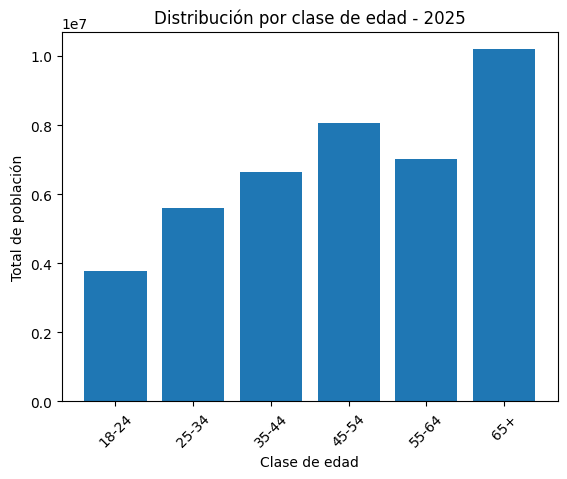

In [88]:
import matplotlib.pyplot as plt

# Filtrar un año específico
df_2025 = df_final[(df_final["Periodo"] == 2025)]

plt.bar(df_2025["Clase de edad"], df_2025["Total"])
plt.title("Distribución por clase de edad - 2025")
plt.xlabel("Clase de edad")
plt.ylabel("Total de población")
plt.xticks(rotation=45)
plt.show()


